 # G2M insight for Cab investment firm
 ## By Brennan Clinch
 ### Data Science Intern at Data Glacier 


Business Objective: XYZ is a private business firm located in the US. XYZ is wanting to invest in the Cab industry. The 2 main companies it is comparing are Pink Cab and Yellow Cab. XYZ needs our help with determining which of the 2 companies would be better to invest in.


Goal: Determine the best Cab company for XYZ to invest in through exploratory data analysis

## Import Data and Libraries

#### Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from scipy.stats import ttest_ind

#### Import Data

- First, we need to load in our data as csvs.

In [9]:
# Read in Cab Data and convert to csv
CabData = pd.read_csv('C:\\Users\\JCCLI\\Downloads\\Cab_Data.csv')

# Read in City data and convert to csv
City = pd.read_csv('C:\\Users\\JCCLI\\Downloads\\City.csv')

# Read in Customer ID data and convert to csv
CustomerID = pd.read_csv('C:\\Users\\JCCLI\\Downloads\\Customer_ID.csv')

# Read in Transaction ID data and convert to csv
TransactionID = pd.read_csv('C:\\Users\\JCCLI\\Downloads\\Transaction_ID.csv')

- Let's now take a look at the previews of our data
- Let's look at the first 10 observations of the Cab data table

In [3]:
CabData.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,1/7/16,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,1/3/16,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,1/7/16,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,1/12/16,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,1/6/16,Pink Cab,BOSTON MA,10.89,156.98,113.256


- Now let's preview the City data table

In [4]:
City.head(18)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


- Next, let's preview the Customer ID data table

In [5]:
CustomerID.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


- Finally, let's preview the Transaction ID data table

In [6]:
TransactionID.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


## Data Cleaning & Wrangling

Before we do our exploratory data analysis for XYZ on the two Cab companies, we need to make sure our data is accurate and any tables can be wrangled together.

### Data Wrangling

#### Joining the data sets

- One thing that must be done before doing any analysis is to see if we can join any of our data sets. By looking at the data tables we can see that the CabData and TransactionID data tables have the same Transaction ID. We can start by merging those 2 data tables

In [10]:
Transactionmerge = CabData.merge(TransactionID, on = "Transaction ID")
Transactionmerge.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,1/8/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,1/6/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,1/2/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,1/7/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,1/3/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


-Next, we also notice that the CustomerID data table and this data table both share Customer ID. Let's do another join on Customer ID.

In [11]:
Customermerge = Transactionmerge.merge(CustomerID, on = "Customer ID")
Customermerge.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,1/8/16,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,7/21/18,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,11/23/18,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,1/6/16,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,4/21/18,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


- Finally, we can finish joining the data tables by joining our previous merged data table with the City data table

In [12]:
Cab = Customermerge.merge(City, on = "City")
Cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,1/8/16,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,7/21/18,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,11/23/18,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,1/6/16,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,4/21/18,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


### Data Cleaning

#### City Capitalization Change

- One issue that should be resolved is changing all caps on the City variable to each word beginning in caps
- A loop was created that took each line from the city column and replaced all caps with the first letter of each word beginning in caps

In [13]:
Cab['City']=Cab['City'].apply(lambda x: x.title())
Cab.head(10000)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,1/8/16,Pink Cab,Atlanta Ga,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,7/21/18,Yellow Cab,Atlanta Ga,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,11/23/18,Yellow Cab,Atlanta Ga,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,1/6/16,Pink Cab,Atlanta Ga,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,4/21/18,Yellow Cab,Atlanta Ga,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10112699,12/5/16,Pink Cab,Austin Tx,17.85,248.48,183.8550,33614,Card,Male,64,13173,"698,371","14,978"
9996,10112701,11/26/16,Pink Cab,Austin Tx,1.92,29.91,20.5440,33770,Cash,Female,26,21669,"698,371","14,978"
9997,10248805,10/29/17,Pink Cab,Austin Tx,23.60,474.81,266.6800,33770,Card,Female,26,21669,"698,371","14,978"
9998,10274784,12/15/17,Pink Cab,Austin Tx,15.84,188.36,185.3280,33770,Cash,Female,26,21669,"698,371","14,978"


#### NA Values/Duplicates 

- Let's now check our data for missing data and duplicates and remove any if necessary

In [11]:
Cab.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

- There doesn't appear to be any missing values in our dataset
- Now let's check for duplicates

In [8]:
duplicates = Cab[Cab.duplicated()]
duplicates

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users


- Looking at this data frame, there don't appear to be any duplicates. Now we are able to begin our exploratory data analysis

#### Data Type Changes
- Let's check the metadata about the data to see if any data types should be changed for when we do our EDA

In [12]:
Cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


- Based on the metadata, we should change Population and Users to int64 so they can be included in our EDA

In [7]:
Cab['Population'] = Cab['Population'].apply(lambda x: x.replace(",",""))
Cab['Population'] = Cab['Population'].astype('int64')

Cab['Users'] = Cab['Users'].apply(lambda x: x.replace(",",""))
Cab['Users'] = Cab['Users'].astype('int64')

### Exploratory Data Analysis

#### Correlation

- To begin our exploratory data analysis, let's take a look at the correlation between our variables

In [14]:
Cab.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


- Based on the correlation, we can see that the top 5 variable relationships that have the highest correlation are KM Travelled:Price Charged, Cost of Trip:KM Travelled, Cost of Trip:Price Charged, Population:Users, and Population:Price Charged

- The biggest correlation is Cost of Trip and KM Travelled

#### User Preference of Company


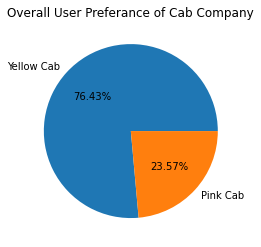

In [13]:
plt.figure()
plt.pie(Cab['Company'].value_counts().values, labels = Cab['Company'].value_counts().index,autopct='%1.2f%%')
plt.title("Overall User Preferance of Cab Company")
plt.show()

- From the diagram, we can see that around 75% of all users prefer Yellow Cab company while only a quarter prefer Pink Cab

##### User Preferance of Cab Company based on city

- Let's create data tables querying both the companies along with the different cities

In [54]:
# Create new data tables to query certain information from Cab data to be used in the visualizations
Chicago = Cab[Cab['City'] == "Chicago Il"]
New_York = Cab[Cab['City'] == "New York Ny"]
Los_Angeles = Cab[Cab['City'] == "Los Angeles Ca"]
Miami = Cab[Cab['City'] == "Miami Fl"]
Silicon_Valley = Cab[Cab['City'] == "Silicon Valley"]
Orange_County = Cab[Cab['City'] == "Orange County"]
San_Diego = Cab[Cab['City'] == "San Diego Ca"]
Phoenix = Cab[Cab['City'] == "Phoenix Az"]
Dallas = Cab[Cab['City'] == "Dallas Tx"]
Atlanta = Cab[Cab['City'] == "Atlanta Ga"]
Denver = Cab[Cab['City'] == "Denver Co"]
Pink = Cab[Cab['Company']=='Pink Cab']
Yellow = Cab[Cab['Company']=="Yellow Cab"]
San_Pink = San_Diego[San_Diego['Company']=='Pink Cab']
New_York_Yellow = New_York[New_York['Company']=='Yellow Cab']

- Below is a bar graph showing the user preference of Cab company based on the city

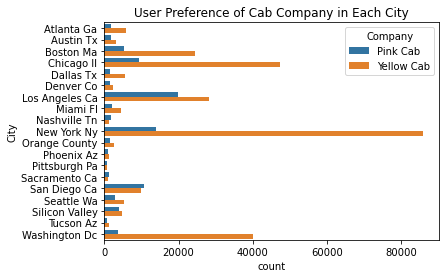

In [15]:
sns.countplot(y='City', hue='Company', data=Cab)
plt.title("User Preference of Cab Company in Each City")
plt.show()

- From the new diagrams showing user preferences depending on cities, the city that had the most users that preferred Yellow Cab was New York
- Likewise, the city that had the most users that preferred Pink Cab was San Diego with almost 1/2 of their users preferring it
- Other cities that preferred Pink Cab over Yellow Cab were Nashville Tn, and Sacramento Ca
- But, overall, Yellow Cab had the most users throughout all the cities

##### User Preferance of Cab company based on age

- Before we look at the user preference based on age, we can create a new variable for our data set splitting up age into different age groups

In [14]:
# Create new categorical variable to dataset breaking up age into segments. 18-19 late teens, 20-29 20's, 30-39 30's, 
# 40-49 40's, 50-59 50's, 60's + Seniors'

def func(age):
    if 18 <= age <= 19:
        return '18-19'
    elif 19 < age <= 29:
        return '20-29'
    elif 29 < age <= 39:
        return '30-39'
    elif 39 < age <= 49:
        return '40-49'
    elif 49 < age <= 59:
        return '50-59'
    else:
        return '60+'

Cab['Age_Group'] = Cab['Age'].apply(func)

- Now that we have created the new variable, let's create visualizations for the age distributions of users

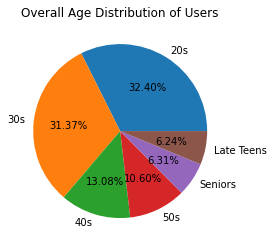

In [18]:
# Overall age range
# Create pie chart on user age groups distribution
plt.figure()
plt.pie(Cab['Age_Group'].value_counts().values, labels = Cab['Age_Group'].value_counts().index,autopct='%1.2f%%')
plt.title("Overall Age Distribution of Users")
plt.show()



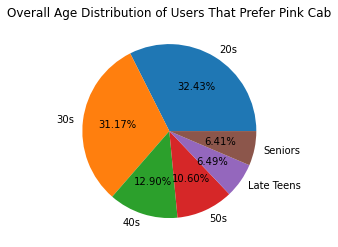

In [19]:
# Pink Cab
plt.figure()
plt.pie(Pink['Age_Group'].value_counts().values, labels = Pink['Age_Group'].value_counts().index,autopct='%1.2f%%')
plt.title("Overall Age Distribution of Users That Prefer Pink Cab")
plt.show()

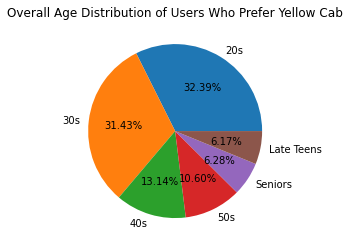

In [20]:
# Yellow Cab
plt.figure()
plt.pie(Yellow['Age_Group'].value_counts().values, labels = Yellow['Age_Group'].value_counts().index,autopct='%1.2f%%')
plt.title("Overall Age Distribution of Users Who Prefer Yellow Cab")
plt.show()

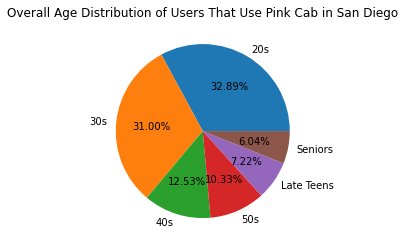

In [21]:
# San Diego Pink Cab
plt.figure()
plt.pie(San_Pink['Age_Group'].value_counts().values, labels = San_Pink['Age_Group'].value_counts().index,autopct='%1.2f%%')
plt.title("Overall Age Distribution of Users That Use Pink Cab in San Diego")
plt.show()

- Based on these pie charts, we can conclude that 20's were the most popular age group among all users, with 30's being a close second

- Pink Cab has a little more users in their 20's than Yellow Cab with users who use Pink Cab and live in San Diego being the highest amount of users who are in their 20s

- Pink Cab also has slightly more users who are seniors

#### Payment Method

- We will now take a look at the user's preferences for mode of payment

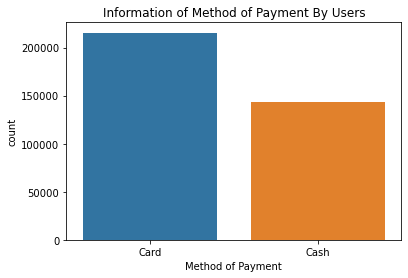

In [22]:
#Overall 
sns.countplot(x = 'Payment_Mode', data = Cab)
plt.xlabel('Method of Payment')
plt.title('Information of Method of Payment By Users')
plt.show()

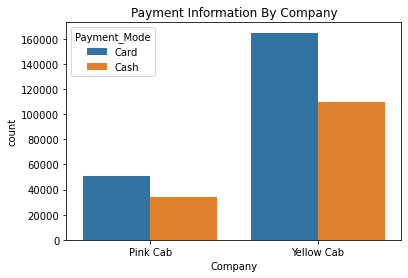

In [23]:
# By company
sns.countplot(x= 'Company', hue = 'Payment_Mode', data = Cab)
plt.title('Payment Information By Company')
plt.show()

 - Overall, both companie's users prefer to pay with a credit card as opposed to cash

#### Cost of Trip

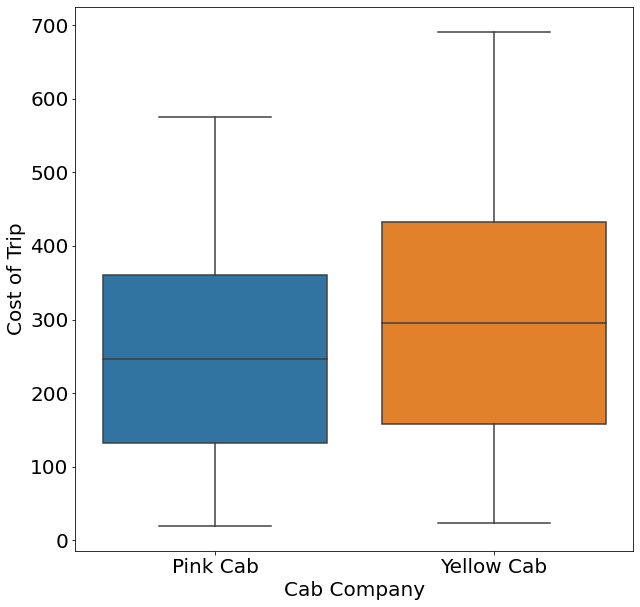

In [24]:
# Find distributions of Cost of Trip for each company
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Company', y = 'Cost of Trip', data = Cab)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Cost of Trip',fontsize = 20)
plt.xlabel('Cab Company',fontsize = 20)
plt.show()

- On average, Pink Cab has a lower cost of trip than Yellow Cab

#### Time Period Analysis

- We will now do a time period analysis of our data by creating new categorical variables based on time periods
- First we will make some changes to the Date of Travel column for us to be able to create our new variables

In [17]:
Cab.rename(columns={'Date of Travel':'Date'},inplace=True)

In [18]:
from datetime import datetime
Cab['Date'] =  pd.to_datetime(Cab['Date'], infer_datetime_format=True)

- We will now create new categorical variables for time periods which will be used in our new visualizations

In [19]:
# Create new columns based on day, month, and year
Cab['Year'] = Cab['Date'].dt.year
Cab['Month'] = Cab['Date'].dt.month
Cab['Day'] = Cab['Date'].dt.day
Cab['Day of Week'] = Cab['Date'].dt.day_name()

# Create Season Variable

def func(Month):
    if 1 <= Month <= 2:
        return 'Winter'
    elif 3 <= Month <= 5:
        return 'Spring'
    elif 6 <= Month <= 8:
        return 'Summer'
    elif 9 <= Month <= 12:
        return 'Fall'
    
Cab['Season'] = Cab['Month'].apply(func)

- Now that we have created our new time analysis variables, we can now create visualizations based on it

Text(0, 0.5, 'Total Number of Users')

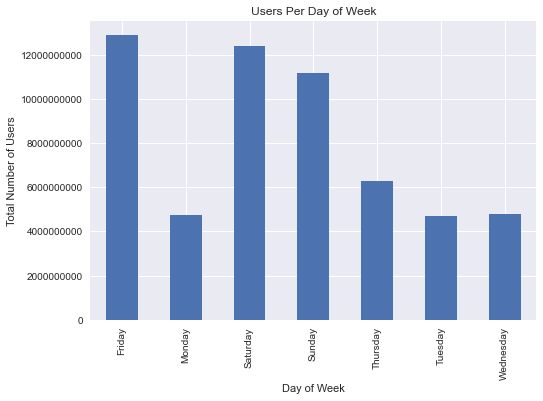

In [29]:
# Users by Day
plt.style.use("seaborn")
x = plt.subplot()
Cab.groupby('Day of Week')['Users'].sum().plot.bar()
x.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
plt.title('Users Per Day of Week')
plt.ylabel("Total Number of Users")

- From the visualization above, it appears that Friday gets the most users along with Saturday and Sunday while Monday and Tuesday get the least users

Text(0, 0.5, 'Total Number of Users')

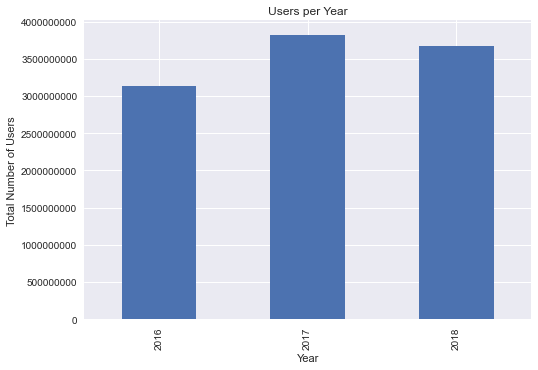

In [32]:
# Users by Year
plt.style.use("seaborn")
x = plt.subplot()
Pink.groupby(['Year'])['Users'].sum().plot.bar()
plt.title('Users per Year')
x.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
plt.ylabel("Total Number of Users")

- To summarize the above visualization, 2017 got the most users

#### Profit Analysis

- For the next part of our EDA, we want to see whether Pink Cab or Yellow Cab would be a better investment based on the amount of profit it can make based on Cab trips
- So to start, we can create a new variable called Profit which is the difference between the Price Charged and the Cost of Trip
- After creating the variable we created boxplots of the distributions of the profit for each Cab company

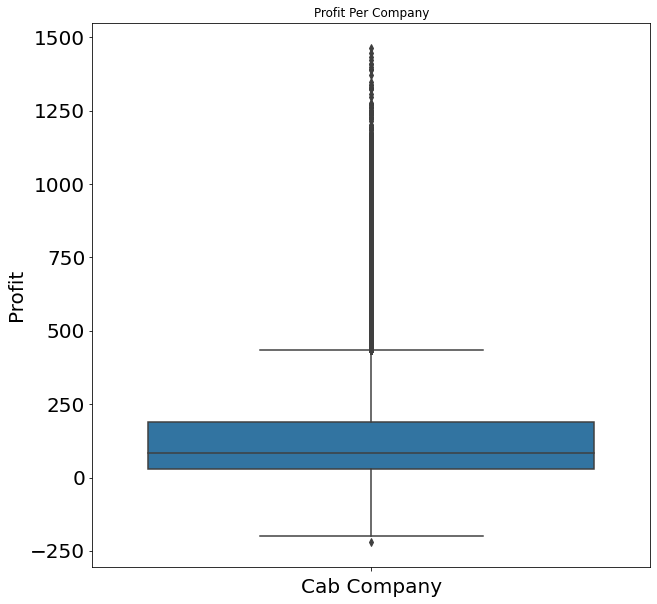

In [20]:
# Create new profit variable
Cab['Profit'] = Cab['Price Charged'] - Cab['Cost of Trip']
# Check profit distribution between companies
plt.figure(figsize = (10,10))
sns.boxplot( y = 'Profit', data = Cab)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Profit',fontsize = 20)
plt.title('Profit Per Company')
plt.xlabel('Cab Company',fontsize = 20)
plt.show()

- From the above boxplots, Yellow Cab gets on average more profit than Pink Cab
- There do appear to be a lot of outliers though in both companies, which further investigation would be ideal in the case of modeling the amount of profit earned in order to make the results interpretable
- Below are summary statistics for the amount of profit earned each year

In [23]:
Yellow['Profit'].groupby(Cab.Year).describe()

NameError: name 'Yellow' is not defined

In [120]:
Pink['Profit'].groupby(Cab.Year).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2016,25080.0,68.321819,82.691391,-198.698,13.0475,46.092,103.67000,1119.48
2017,30321.0,67.070839,84.074658,-220.060,10.9580,44.180,102.12200,1056.11
2018,29310.0,53.229689,64.032374,-147.477,10.2465,35.939,79.78875,827.54


- From the summary statistics, it appears that the year that got the most profit on average for both companies was 2016
- We can clearly see the effect of the outlying values since the mean and median are off by a little
- Next, we created queries for the Profit earned by both companies each month which would then be used in the next visualization

In [61]:
# Profit per month for both companies
Profitjan = Cab[Cab['Month']==1]
Profitfeb = Cab[Cab['Month']==2]
Profitmar = Cab[Cab['Month']==3]
Profitapr = Cab[Cab['Month']==4]
Profitmay = Cab[Cab['Month']==5]
Profitjun = Cab[Cab['Month']==6]
Profitjul = Cab[Cab['Month']==7]
Profitaug = Cab[Cab['Month']==8]
Profitsep = Cab[Cab['Month']==9]
Profitoct = Cab[Cab['Month']==10]
Profitnov = Cab[Cab['Month']==11]
Profitdec = Cab[Cab['Month']==12]

# Convert to int
Profitjan['Profit'] = Profitjan['Profit'].astype('int64')
Profitfeb['Profit'] = Profitfeb['Profit'].astype('int64')
Profitmar['Profit'] = Profitmar['Profit'].astype('int64')
Profitapr['Profit'] = Profitapr['Profit'].astype('int64')
Profitmay['Profit'] = Profitmay['Profit'].astype('int64')
Profitjun['Profit'] = Profitjun['Profit'].astype('int64')
Profitjul['Profit'] = Profitjul['Profit'].astype('int64')
Profitaug['Profit'] = Profitaug['Profit'].astype('int64')
Profitsep['Profit'] = Profitsep['Profit'].astype('int64')
Profitoct['Profit'] = Profitoct['Profit'].astype('int64')
Profitnov['Profit'] = Profitnov['Profit'].astype('int64')
Profitdec['Profit'] = Profitdec['Profit'].astype('int64')

# Find totals
Profitsumjan = sum(Profitjan.Profit)
Profitsumfeb = sum(Profitfeb.Profit)
Profitsummar = sum(Profitmar.Profit)
Profitsumapr = sum(Profitapr.Profit)
Profitsummay = sum(Profitmay.Profit)
Profitsumjun = sum(Profitjun.Profit)
Profitsumjul = sum(Profitjul.Profit)
Profitsumaug = sum(Profitaug.Profit)
Profitsumsep = sum(Profitsep.Profit)
Profitsumoct = sum(Profitoct.Profit)
Profitsumnov = sum(Profitnov.Profit)
Profitsumdec = sum(Profitdec.Profit)

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_17984\789297715.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Profitjan['Profit'] = Profitjan['Profit'].astype('int64')
C:\Users\JCCLI\AppData\Local\Temp\ipykernel_17984\789297715.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Profitfeb['Profit'] = Profitfeb['Profit'].astype('int64')
C:\Users\JCCLI\AppData\Local\Temp\ipykernel_17984\789297715.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

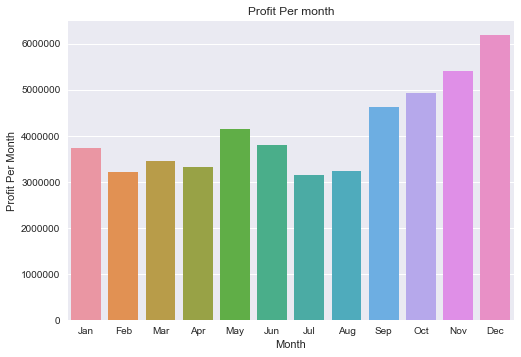

In [128]:
# Total Profit Per Month
Profit_Per_Month = (Profitsumjan,Profitsumfeb,Profitsummar,Profitsumapr,Profitsummay,Profitsumjun,Profitsumjul,Profitsumaug,
                   Profitsumsep,Profitsumoct,Profitsumnov,Profitsumdec)
Month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ProfitDF = pd.DataFrame({'Profit Per Month': Profit_Per_Month})
MonthDF = pd.DataFrame({'Month': Month})
frame = [MonthDF,ProfitDF]
ProfitPerMonth = pd.concat(frame,axis = 1, join = 'inner')
ProfitPerMonth
x = plt.subplot()
sns.barplot(y= 'Profit Per Month',x= 'Month', data=ProfitPerMonth)
x.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
plt.title("Profit Per month")
plt.show()

- Overall December had the most profit made whereas July made the least profit
- We next want to check the seasonal trends on the profit being made, to do that, we will create more queries to be used for our visualization on the seasonal trends

In [55]:
# Create queries for the pink cab industry and their profits
Pink_2016 = Pink[Pink['Year']==2016]
Pink_2017 = Pink[Pink['Year']==2017]
Pink_2018 = Pink[Pink['Year']==2018]
Pink_Wi2016pr = Pink_2016[Pink_2016['Season']=='Winter'].Profit.sum()
Pink_Sp2016pr = Pink_2016[Pink_2016['Season']=='Spring'].Profit.sum()
Pink_Su2016pr = Pink_2016[Pink_2016['Season']=='Summer'].Profit.sum()
Pink_Fa2016pr = Pink_2016[Pink_2016['Season']=='Fall'].Profit.sum()

#2017
Pink_Wi2017pr = Pink_2017[Pink_2017['Season']=='Winter'].Profit.sum()
Pink_Sp2017pr = Pink_2017[Pink_2017['Season']=='Spring'].Profit.sum()
Pink_Su2017pr = Pink_2017[Pink_2017['Season']=='Summer'].Profit.sum()
Pink_Fa2017pr = Pink_2017[Pink_2017['Season']=='Fall'].Profit.sum()

#2018
Pink_Wi2018pr = Pink_2018[Pink_2018['Season']=='Winter'].Profit.sum()
Pink_Sp2018pr = Pink_2018[Pink_2018['Season']=='Spring'].Profit.sum()
Pink_Su2018pr = Pink_2018[Pink_2018['Season']=='Summer'].Profit.sum()
Pink_Fa2018pr = Pink_2018[Pink_2018['Season']=='Fall'].Profit.sum()

In [131]:
# Create queries for the yellow cab industry and their profits
Yellow_2016 = Yellow[Yellow['Year']==2016]
Yellow_2017 = Yellow[Yellow['Year']==2017]
Yellow_2018 = Yellow[Yellow['Year']==2018]
Yellow_Wi2016pr = Yellow_2016[Yellow_2016['Season']=='Winter'].Profit.sum()
Yellow_Sp2016pr = Yellow_2016[Yellow_2016['Season']=='Spring'].Profit.sum()
Yellow_Su2016pr = Yellow_2016[Yellow_2016['Season']=='Summer'].Profit.sum()
Yellow_Fa2016pr = Yellow_2016[Yellow_2016['Season']=='Fall'].Profit.sum()

#2017
Yellow_Wi2017pr = Yellow_2017[Yellow_2017['Season']=='Winter'].Profit.sum()
Yellow_Sp2017pr = Yellow_2017[Yellow_2017['Season']=='Spring'].Profit.sum()
Yellow_Su2017pr = Yellow_2017[Yellow_2017['Season']=='Summer'].Profit.sum()
Yellow_Fa2017pr = Yellow_2017[Yellow_2017['Season']=='Fall'].Profit.sum()

#2018
Yellow_Wi2018pr = Yellow_2018[Yellow_2018['Season']=='Winter'].Profit.sum()
Yellow_Sp2018pr = Yellow_2018[Yellow_2018['Season']=='Spring'].Profit.sum()
Yellow_Su2018pr = Yellow_2018[Yellow_2018['Season']=='Summer'].Profit.sum()
Yellow_Fa2018pr = Yellow_2018[Yellow_2018['Season']=='Fall'].Profit.sum()

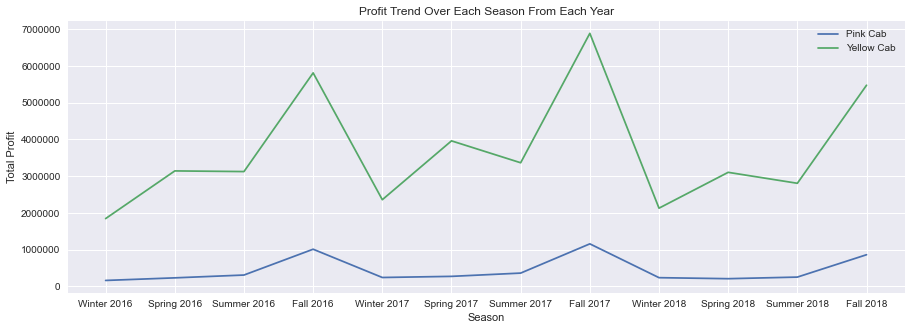

In [132]:
# Create line graph of profit by season
plt.figure(figsize = (15,5))

season = ['Winter 2016','Spring 2016','Summer 2016', 'Fall 2016', 'Winter 2017','Spring 2017', 'Summer 2017', 'Fall 2017',
         'Winter 2018', 'Spring 2018', 'Summer 2018', 'Fall 2018']
Pink_Season = [Pink_Wi2016pr, Pink_Sp2016pr, Pink_Su2016pr, Pink_Fa2016pr, Pink_Wi2017pr, Pink_Sp2017pr, Pink_Su2017pr,
              Pink_Fa2017pr, Pink_Wi2018pr, Pink_Sp2018pr, Pink_Su2018pr, Pink_Fa2018pr]
Yellow_Season = [Yellow_Wi2016pr, Yellow_Sp2016pr, Yellow_Su2016pr, Yellow_Fa2016pr, Yellow_Wi2017pr, Yellow_Sp2017pr, Yellow_Su2017pr,
              Yellow_Fa2017pr, Yellow_Wi2018pr, Yellow_Sp2018pr, Yellow_Su2018pr, Yellow_Fa2018pr]
x = plt.subplot()
plt.plot(season, Pink_Season, label = "Pink Cab" )
plt.plot(season, Yellow_Season, label = "Yellow Cab")
plt.legend()
plt.xlabel('Season')
plt.ylabel('Total Profit')
plt.title('Profit Trend Over Each Season From Each Year')
x.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
plt.show()


- From the above line graph, we can clearly see some important details:
- For Pink Cab, Total Profit steadily increased from Winter 2016 to the beginning of the summer of 2016. It then increased at a significant rate from the summer to the fall of 2016, and then decreased during Winter 2017. It then did the same trend throughout 2017 as well as 2018 with Fall of 2017 having the peak amount of total profit.
- For Yellow Cab, in 2016, profit increased during the winter and stayed relatively constant in the spring, then signficantly increasing in the fall, and then having a sharp decrease in Winter 2017. Profit then had similar trends for the rest of 2017 as well as 2018 except that Fall 2017 had the highest amount of profit made and Spring of 2017 and 2018 had a much higher decrease in profit than 2016 where it was close to constant
- To sum it up, Yellow Cab made much more profit than Pink Cab over the whole time period and we can see that fall is the season where both companies make the most profit and winter they make the least profit

###### Profit Ratio and Cost/KM Ratio

- For the final variables we would like to add to our dataset, they include Profit Ratio, which is the amount of profit made per KM travelled by the users, along with Cost per KM which is the cost of the trip for every KM travelled

In [21]:
# Create new ratio variables for profit and cost per trip/km travelled
Cab['Profit per KM'] = Cab['Profit']/Cab['KM Travelled']
Cab['Cost per KM'] = Cab['Cost of Trip']/Cab['KM Travelled']

- Now that we have added our final variables to our dataset, let's look at the summary statistics for the Profit Ratios in the 2 companies

In [107]:
# Profit Ratio Per Year for Yellow Cab
Yellow['Profit Ratio'].groupby(Yellow['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2016,82239.0,7.489847,6.012370,-4.014767,2.837624,5.935160,11.413375,32.790518
2017,98189.0,7.494612,5.997240,-4.998235,2.920640,6.115118,11.196156,41.115556
2018,94253.0,6.364805,5.280291,-3.884524,2.206485,4.743605,10.223590,32.419085


In [108]:
# Profit Ratio Per Year for Pink Cab
Pink['Profit Ratio'].groupby(Pink['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2016,25080.0,3.026813,2.864716,-4.668656,1.037919,2.737027,4.656526,28.646939
2017,30321.0,2.962883,2.917109,-4.912054,0.855548,2.598469,4.699973,28.191991
2018,29310.0,2.350447,2.220392,-4.300000,0.827743,2.076777,3.586841,22.863026


In [109]:
# Profit Ratio Per Year Overall
Cab['Profit Ratio'].groupby(Cab['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2016,107319.0,6.446855,5.760698,-4.668656,2.233850,4.799859,9.619257,32.790518
2017,128510.0,6.425384,5.761132,-4.998235,2.188149,4.943858,9.475964,41.115556
2018,123563.0,5.412571,5.035182,-4.300000,1.711047,3.757143,8.375572,32.419085


In [112]:
# Cost Ratio Per Year for Yellow Cab
Yellow['Cost per KM'].groupby(Yellow['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2016,82239.0,13.201233,0.726002,12.0,12.6,13.2,13.8,14.4
2017,98189.0,13.203314,0.727516,12.0,12.6,13.2,13.8,14.4
2018,94253.0,13.197118,0.727151,12.0,12.6,13.2,13.8,14.4


In [113]:
# Cost Ratio Per Year for Pink Cab
Pink['Cost per KM'].groupby(Pink['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2016,25080.0,10.992815,0.604748,10.0,10.5,11.0,11.5,12.0
2017,30321.0,10.998588,0.606996,10.0,10.5,11.0,11.5,12.0
2018,29310.0,11.003569,0.607741,10.0,10.5,11.0,11.5,12.0


In [114]:
Cab['Cost per KM'].groupby(Cab['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2016,107319.0,12.685135,1.167381,10.0,12.0,12.84,13.68,14.4
2017,128510.0,12.683125,1.169450,10.0,12.0,12.84,13.68,14.4
2018,123563.0,12.676793,1.166860,10.0,12.0,12.84,13.68,14.4


Based on the summary of our new variables which are Cost per KM and Profit Ratio, we can see that over the 3 years, the mean numbers for each company have stayed relatively close to the same as one another. For Cost per KM, we see that for all 3, the mean and the median are almost the same, which means that the data must be relatively normal and either not have a lot of outliers or are heavily skewed. However, we can see that the distributions for Profit Ratio over Yellow Cab, Pink Cab, and overall might be a little skewed and have some outliers since the mean and median can be off by like 1-2 whole units approximately. So to see whether there was any difference in Profit Ratio over the 3 years (particularly 2016 and 2017), we can test the hypotheses in the next section of our EDA. So if we were going to do modeling/machine learning for the Profit Ratio, it would be wise to remove our outliers in order to have more interprebility.

#### Hypothesis Testing

- Now that we have created our visualizations, we want to test 3 hypotheses on some of the trends that we saw during our EDA that would be nice to investigate

###### Hypothesis 1: Is there a significant difference between the Cost of Trip from the Pink Cab company given the payment mode?

- Null Hypothesis H0: There is no significant difference between the cost of trip from the Pink Cab company given the payment   mode
- Alternative Hypothesis HA: There is a significant difference between the cost of trip from the Pink Cab company given the payment mode



In [193]:
mu1 = Cab[(Cab.Company=='Pink Cab') & (Cab.Payment_Mode == 'Cash')].groupby('Transaction ID')['Cost of Trip'].mean()
mu2 = Cab[(Cab.Company=='Pink Cab')  & (Cab.Payment_Mode =='Card')].groupby('Transaction ID')['Cost of Trip'].mean()
_, p_value = ttest_ind(mu1.values,mu2.values)

print("P-Value:",round(p_value,8))
if (p_value <= 0.05):
    print("We can reject the null hypothesis and conclude that there is a significant difference between the cost of the trip based on payment method for Pink Cab company.")
else: 
    print("We fail to reject the null hypothesis and conclude that there is no significant difference between the cost of the trip based on payment method for Pink Cab company.")

P-Value: 0.37432686
We fail to reject the null hypothesis and conclude that there is no significant difference between the cost of the trip based on payment method for Pink Cab company.


##### Hypothesis 2 : Is there a significant difference between the amount of users in 2017 and 2018?

- Null Hypothesis H0: There is no significant difference between the amount of users in 2017 and 2018
- Alternative Hypothesis HA: There is a significant difference between the amount of users in 2017 and 2018

In [49]:
mu1 = Cab[(Cab.Year == 2017) & (Cab.Company == "Yellow Cab")]['Users'].mean()
mu2 = Cab[(Cab.Year == 2018) & (Cab.Company == "Yellow Cab")].groupby('Transaction ID')['Users'].mean()
_, p_value = ttest_ind(mu1.values,mu2.values)

print("P-Value:",round(p_value,8))
if (p_value <= 0.05):
    print("We can reject the null hypothesis and conclude that there is a significant difference between the amount of users in 2017 and 2018 for Yellow Cab.")
else: 
    print("We fail to reject the null hypothesis and conclude that there is no significant difference between the amount of users in 2017 and 2018 for Yellow Cab.")
    

AttributeError: 'float' object has no attribute 'values'

In [240]:
mu1 = Cab[(Cab.Year == 2017) & (Cab.Company == "Pink Cab")]['Users'].sum()
mu2 = Cab[(Cab.Year == 2018) & (Cab.Company == "Pink Cab")]['Users'].sum()
_, p_value = ttest_ind(mu1.values,mu2.values)

print("P-Value:",round(p_value,8))
if (p_value <= 0.05):
    print("We can reject the null hypothesis and conclude that there is a significant difference between the amount of users in 2017 and 2018 for Pink Cab.")
else: 
    print("We fail to reject the null hypothesis and conclude that there is no significant difference between the amount of users in 2017 and 2018 for Pink Cab.")

P-Value: 0.38192002
We fail to reject the null hypothesis and conclude that there is no significant difference between the amount of users in 2017 and 2018 for Pink Cab.


##### Hypothesis 3: Is there a significant difference in the Profit Ratio (Profit/KM Travelled) during 2016 and 2017?

In [117]:
mu1 = Cab[(Cab.Year == 2016) & (Cab.Company == "Pink Cab")].groupby('Transaction ID')['Profit Ratio'].mean()
mu2 = Cab[(Cab.Year == 2017) & (Cab.Company == "Pink Cab")].groupby('Transaction ID')['Profit Ratio'].mean()
_, p_value = ttest_ind(mu1.values,mu2.values)

print("P-Value:",round(p_value,8))
if (p_value <= 0.05):
    print("We can reject the null hypothesis and conclude that there is a significant difference between the Profit Ratios in 2016 and 2017 for Pink Cab.")
else: 
    print("We fail to reject the null hypothesis and conclude that there is no significant difference between the Profit Ratios in 2016 and 2017 for Pink Cab.")

P-Value: 0.00964014
We can reject the null hypothesis and conclude that there is a significant difference between the Profit Ratio's in 2016 and 2017 for Pink Cab.


In [116]:
mu1 = Cab[(Cab.Year == 2016) & (Cab.Company == "Yellow Cab")].groupby('Transaction ID')['Profit Ratio'].mean()
mu2 = Cab[(Cab.Year == 2017) & (Cab.Company == "Yellow Cab")].groupby('Transaction ID')['Profit Ratio'].mean()
_, p_value = ttest_ind(mu1.values,mu2.values)

print("P-Value:",round(p_value,8))
if (p_value <= 0.05):
    print("We can reject the null hypothesis and conclude that there is a significant difference between Profit Ratios in 2016 and 2017 for Yellow Cab.")
else: 
    print("We fail to reject the null hypothesis and conclude that there is no significant difference between the Profit Ratios in 2016 and 2017 for Yellow Cab.")

P-Value: 0.86666235
We fail to reject the null hypothesis and conclude that there is no significant difference between the Profit Ratios in 2016 and 2017 for Yellow Cab.


## Conclusions

#### EDA Results

Based on our results from the exploratory data analysis, here are the summaries of our findings from the visualizations:

- Overall, Yellow Cab has more popularity than Pink Cab with around 75% of users prefering it
- However, certain cities in the US prefer Pink Cab such as Nashville and San Diego
- The most popular seasons where both Cab Companies have the most users and make the most profit is in the fall and early winter.
- Young adults are the most popular user demographic for both Cab companie's services.
- Overall most users prefer to pay with a credit card
- Weekends are when both companies services are used the most
- 2017 is the year both companies had the biggest success
- December made the most total profit overall
- New York, Chicago, and Washington DC have the most Yellow Cab users. This makes total sense since they are major metropolitan areas in the US 



#### Decision for XYZ

Overall, based on the analysis, Yellow Cab is the best company to invest in.
- For one, it attained the most popularity between users.
- Second, it has made far more profit during all times from 2016-2018 than Pink Cab.
- However, for users, it appears that Pink Cab would be a good company to use if they want lower prices, and that further analysis might be recommended for areas where users prefer Pink Cab like San Diego

In [25]:
# Save final dataset as csv for modeling
import os 
Cab.to_csv('Cab.csv')

In [34]:
mu1

Transaction ID
10129103     24701
10129113     24701
10129119     24701
10129123     24701
10129129     24701
             ...  
10291480    127001
10291481    127001
10291496    127001
10291498    127001
10291505    127001
Name: Users, Length: 98189, dtype: int64

In [45]:
mu1 = Cab[(Cab.Year == 2016) & (Cab.Company == "Yellow Cab")]['Users'].sum()


mu2 = Cab[(Cab.Year == 2017) & (Cab.Company == "Yellow Cab")]['Users'].sum()
mu2

3826605399

In [46]:
mu1

3133195861

3826605399

3679122128

In [22]:
Cab.head()

,Transaction ID,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Users,Age_Group,Year,Month,Day,Day of Week,Season,Profit,Profit Ratio,Cost per KM
0,10000011,2016-01-08,Pink Cab,Atlanta Ga,30.45,370.95,313.6350,29290,Card,Male,...,24701,20s,2016,1,8,Friday,Winter,57.3150,1.882266,10.30
1,10351127,2018-07-21,Yellow Cab,Atlanta Ga,26.19,598.70,317.4228,29290,Cash,Male,...,24701,20s,2018,7,21,Saturday,Summer,281.2772,10.739870,12.12
2,10412921,2018-11-23,Yellow Cab,Atlanta Ga,42.55,792.05,597.4020,29290,Card,Male,...,24701,20s,2018,11,23,Friday,Fall,194.6480,4.574571,14.04
3,10000012,2016-01-06,Pink Cab,Atlanta Ga,28.62,358.52,334.8540,27703,Card,Male,...,24701,20s,2016,1,6,Wednesday,Winter,23.6660,0.826904,11.70
4,10320494,2018-04-21,Yellow Cab,Atlanta Ga,36.38,721.10,467.1192,27703,Card,Male,...,24701,20s,2018,4,21,Saturday,Spring,253.9808,6.981330,12.84


In [23]:
def income_group(x):
    if x <= 5000:
        return '$0-$5,000'
    elif x > 5000 and x <= 10000:
        return '$5,000-$10,000'
    elif x > 10000 and x <= 15000:
        return '$10,000-$15,000'
    elif x > 15000 and x <= 20000:
        return '$15,000-$20,000'
    elif x > 20000 and x <= 25000:
        return '$20,000-$25,000'
    else:
        return '$25,000+'
Cab['Income group'] = Cab['Income (USD/Month)'].apply(income_group)

In [24]:
Cab.to_csv('C://Users//JCCLI//Downloads//G2M_Data.csv',index=False,header=True)